<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/Petr4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [43]:
# leitura dos conjuntos de dados

petr4 = pd.read_csv('ACAO.txt', sep=',', encoding='UTF-8', low_memory=False) #

In [44]:
petr4.head(5)

,Data,Fechamento,Maxima,Minima
0,15/jun/20,20.71,21.09,19.54
1,16/jun/20,21.36,21.91,21.17
2,17/jun/20,21.45,21.85,21.15
3,18/jun/20,21.59,21.77,21.08
4,19/jun/20,21.30,22.22,21.22


In [53]:
petr4.shape

(251, 4)

In [54]:
petr4['Data']

0      15/jun/20
1      16/jun/20
2      17/jun/20
3      18/jun/20
4      19/jun/20
         ...    
246    24/Mai/21
247    25/Mai/21
248    26/Mai/21
249    27/Mai/21
250    28/Mai/21
Name: Data, Length: 251, dtype: object

In [55]:
petr4['Fechamento']

0      20.71
1      21.36
2      21.45
3      21.59
4      21.30
       ...  
246    26.35
247    25.88
248    26.07
249    25.91
250    27.00
Name: Fechamento, Length: 251, dtype: float64

In [56]:
petr4['Maxima']

0      21.09
1      21.91
2      21.85
3      21.77
4      22.22
       ...  
246    26.52
247    26.62
248    26.18
249    26.25
250    27.02
Name: Maxima, Length: 251, dtype: float64

In [57]:
petr4['Minima']

0      19.54
1      21.17
2      21.15
3      21.08
4      21.22
       ...  
246    25.99
247    25.78
248    25.65
249    25.77
250    26.15
Name: Minima, Length: 251, dtype: float64

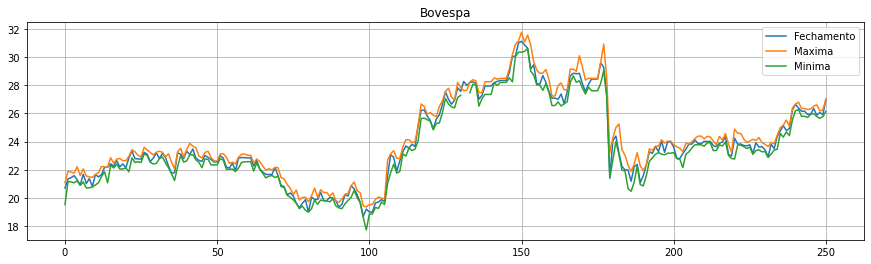

In [52]:
petr4[['Fechamento','Maxima', 'Minima']].plot(figsize=(15, 4), title='Bovespa', grid=True)